In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np

#train test split
from sklearn.model_selection import train_test_split


#function to get a mode of a dataset
from statistics import mode
#normalizing dataset
from sklearn.preprocessing import StandardScaler

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks


#For resampling process to change the ratio of imbalanced ratio of the classes 
#testing various ratios
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
#resampling
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data -DSfB/archive/merged_df.csv')
df.head(3)

,Unnamed: 0,id,campaign_id,coupon_id,customer_id,redemption_status,avg_cp_discount,avg_order_quantity,avg_oth_discount,avg_price,...,age_range,marital_status,rented,family_size,no_of_children,income_bracket,campaign_type,start_date,end_date,duration_days
0,0,1,13,27,1053,0,-1.241694,1.169768,-51.732305,84.478583,...,46-55,unknown,0.0,1,0,5.0,X,2013-05-19,2013-05-07,-12
1,1,2,13,116,48,0,0.000000,1.050926,-10.661343,63.833519,...,36-45,Married,0.0,2,0,3.0,X,2013-05-19,2013-05-07,-12
2,2,6,9,635,205,0,-2.987321,1.353802,-142.498493,332.128380,...,46-55,Married,0.0,2,0,7.0,Y,2013-11-03,2013-12-04,31


In [ ]:
del df["Unnamed: 0"]

In [ ]:
df.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'avg_cp_discount', 'avg_order_quantity', 'avg_oth_discount',
       'avg_price', 'avg_total_discount', 'ct_brands', 'brand_type',
       'mode_cat', 'ct_cust_it', 'ct_orders', 'ct_items', 'sum_cp_discount',
       'sum_cp_used', 'sum_order_quantity', 'sum_oth_discount',
       'sum_total_discount', 'ct_cat', 'avg_cp_discount_cust',
       'avg_cp_used_cust', 'ct_items_cust', 'avg_oth_discount_cust',
       'avg_quantity_cust', 'avg_price_cust', 'sum_quantity_cust',
       'sum_price_cust', 'sum_oth_disccount_cust', 'sum_cp_discount_cust',
       'ct_cp_used_cust', 'age_range', 'marital_status', 'rented',
       'family_size', 'no_of_children', 'income_bracket', 'campaign_type',
       'start_date', 'end_date', 'duration_days'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      78369 non-null  int64  
 1   campaign_id             78369 non-null  int64  
 2   coupon_id               78369 non-null  int64  
 3   customer_id             78369 non-null  int64  
 4   redemption_status       78369 non-null  int64  
 5   avg_cp_discount         78369 non-null  float64
 6   avg_order_quantity      78369 non-null  float64
 7   avg_oth_discount        78369 non-null  float64
 8   avg_price               78369 non-null  float64
 9   avg_total_discount      78369 non-null  float64
 10  ct_brands               78369 non-null  int64  
 11  brand_type              78369 non-null  object 
 12  mode_cat                78369 non-null  object 
 13  ct_cust_it              78369 non-null  float64
 14  ct_orders               78369 non-null

In [ ]:
df.describe()

,id,campaign_id,coupon_id,customer_id,redemption_status,avg_cp_discount,avg_order_quantity,avg_oth_discount,avg_price,avg_total_discount,...,avg_quantity_cust,avg_price_cust,sum_quantity_cust,sum_price_cust,sum_oth_disccount_cust,sum_cp_discount_cust,ct_cp_used_cust,rented,income_bracket,duration_days
count,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,...,78369.000000,78369.000000,7.836900e+04,78369.000000,78369.000000,78369.000000,78369.000000,43661.000000,43661.000000,78369.000000
mean,64347.975449,13.974441,566.363243,787.451888,0.009302,-2.265920,1.173147,-24.627777,153.914308,-26.893697,...,128.055506,116.003809,1.412794e+05,119180.270731,-18440.669741,-670.316295,18.391430,0.057374,4.802478,34.154538
std,37126.440855,8.019215,329.966054,456.811339,0.095999,5.814932,0.264655,26.862557,138.702717,28.164879,...,216.197239,31.576526,2.414470e+05,81901.616150,13045.169905,1275.994181,38.662831,0.232558,2.344019,78.669091
min,1.000000,1.000000,1.000000,1.000000,0.000000,-71.240000,1.000000,-733.130000,23.616503,-760.438667,...,1.042453,47.739190,8.800000e+01,8338.540000,-101428.310000,-11937.800000,0.000000,0.000000,1.000000,-289.000000
25%,32260.000000,8.000000,280.000000,399.000000,0.000000,-2.101764,1.032746,-32.240629,85.108789,-35.113080,...,1.403756,95.877243,1.593000e+03,59205.590000,-23509.230000,-719.510000,1.000000,0.000000,3.000000,-12.000000
50%,64318.000000,13.000000,597.000000,781.000000,0.000000,-0.608013,1.095333,-17.999941,113.166224,-20.184006,...,39.755390,111.057371,3.164100e+04,98840.740000,-15290.490000,-224.400000,5.000000,0.000000,5.000000,62.000000
75%,96577.000000,13.000000,857.000000,1190.000000,0.000000,0.000000,1.202614,-9.455043,173.600912,-10.775942,...,190.594817,130.539012,1.847090e+05,155596.980000,-9294.290000,-39.180000,17.000000,0.000000,6.000000,77.000000
max,128595.000000,30.000000,1115.000000,1582.000000,1.000000,0.000000,4.096092,0.000000,1275.897712,0.000000,...,3490.058667,387.717920,2.617544e+06,583638.780000,-734.800000,0.000000,430.000000,1.000000,12.000000,182.000000


In [ ]:
df.dtypes

id                          int64
campaign_id                 int64
coupon_id                   int64
customer_id                 int64
redemption_status           int64
avg_cp_discount           float64
avg_order_quantity        float64
avg_oth_discount          float64
avg_price                 float64
avg_total_discount        float64
ct_brands                   int64
brand_type                 object
mode_cat                   object
ct_cust_it                float64
ct_orders                 float64
ct_items                    int64
sum_cp_discount           float64
sum_cp_used               float64
sum_order_quantity        float64
sum_oth_discount          float64
sum_total_discount        float64
ct_cat                      int64
avg_cp_discount_cust      float64
avg_cp_used_cust          float64
ct_items_cust               int64
avg_oth_discount_cust     float64
avg_quantity_cust         float64
avg_price_cust            float64
sum_quantity_cust         float64
sum_price_cust

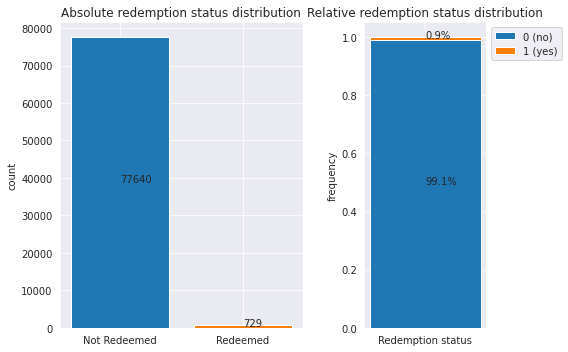

In [ ]:
keys, counts = np.unique(df.redemption_status, return_counts=True)
counts_norm = counts/counts.sum()

fig = plt.figure(figsize=(8, 5)) #specify figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[2,1]) #specify relative size of left and right plot

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['Not Redeemed', 'Redeemed'], counts, color=['#1f77b4','#ff7f0e']) #left bar plot
ax0 = plt.title('Absolute redemption status distribution') 
ax0 = plt.ylabel('count')
ax0 = plt.text(keys[0], counts[0]/2, counts[0]) #add text box with count of non-fraudulent cases
ax0 = plt.text(keys[1], counts[1]/2, counts[1]) #add text box with count of fraudulent cases

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Redemption status'], [counts_norm[0]], label='0 (no)')
ax1 = plt.bar(['Redemption status'], [counts_norm[1]], bottom=counts_norm[0], label='1 (yes)')
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Relative redemption status distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['Redemption status'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['Redemption status'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

### Missing values

In [ ]:
df.isna().any()

id                        False
campaign_id               False
coupon_id                 False
customer_id               False
redemption_status         False
avg_cp_discount           False
avg_order_quantity        False
avg_oth_discount          False
avg_price                 False
avg_total_discount        False
ct_brands                 False
brand_type                False
mode_cat                  False
ct_cust_it                False
ct_orders                 False
ct_items                  False
sum_cp_discount           False
sum_cp_used               False
sum_order_quantity        False
sum_oth_discount          False
sum_total_discount        False
ct_cat                    False
avg_cp_discount_cust      False
avg_cp_used_cust          False
ct_items_cust             False
avg_oth_discount_cust     False
avg_quantity_cust         False
avg_price_cust            False
sum_quantity_cust         False
sum_price_cust            False
sum_oth_disccount_cust    False
sum_cp_d

In [ ]:
df.age_range.unique()

array(['46-55', '36-45', nan, '18-25', '26-35', '56-70', '70+'],
      dtype=object)

In [ ]:
df.fillna({'age_range':'unknown'}, inplace=True)

In [ ]:
df.fillna({'marital_status':'unknown'}, inplace=True)

In [ ]:
df.fillna({'rented':0}, inplace= True)

In [ ]:
df.fillna({'family_size':'1'}, inplace=True)

In [ ]:
df.fillna({'no_of_children':'0'},inplace=True)

In [ ]:
df.fillna({'income_bracket':5}, inplace=True)

### Dummy Variables

In [ ]:
Y = df.redemption_status

In [ ]:
cols = list(set(df.columns)-set(['redemption_status','start_date','end_date']))
X=df[cols]

In [ ]:
X1=X[['age_range','marital_status']]

In [ ]:
X1=pd.get_dummies(X1)

In [ ]:
X1.columns

Index(['age_range_18-25', 'age_range_26-35', 'age_range_36-45',
       'age_range_46-55', 'age_range_56-70', 'age_range_70+',
       'age_range_unknown', 'marital_status_Married', 'marital_status_Single',
       'marital_status_unknown'],
      dtype='object')

In [ ]:
for col in X1.columns:
    if 'unknown' in col:
        X1.drop(col,axis=1,inplace=True)

In [ ]:
X.drop(['age_range','marital_status'], axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X = X.join(X1)

### Correlated features

In [ ]:
X.columns

Index(['customer_id', 'ct_cust_it', 'duration_days', 'avg_order_quantity',
       'avg_price_cust', 'ct_cp_used_cust', 'sum_order_quantity', 'ct_brands',
       'avg_cp_discount', 'coupon_id', 'avg_cp_used_cust', 'sum_cp_discount',
       'avg_total_discount', 'ct_cat', 'sum_total_discount', 'ct_items_cust',
       'campaign_id', 'avg_quantity_cust', 'ct_orders', 'sum_cp_used',
       'avg_price', 'sum_oth_discount', 'avg_cp_discount_cust',
       'avg_oth_discount', 'income_bracket', 'ct_items',
       'avg_oth_discount_cust', 'sum_oth_disccount_cust', 'rented',
       'sum_quantity_cust', 'sum_cp_discount_cust', 'sum_price_cust', 'id',
       'mode_cat_Dairy, Juices & Snacks', 'mode_cat_Flowers & Plants',
       'mode_cat_Grocery', 'mode_cat_Meat', 'mode_cat_Natural Products',
       'mode_cat_Packaged Meat', 'mode_cat_Pharmaceutical',
       'mode_cat_Prepared Food', 'mode_cat_Seafood',
       'mode_cat_Skin & Hair Care', 'no_of_children_1', 'no_of_children_2',
       'no_of_childre

In [ ]:
corr = X.corr().abs()
corr

,customer_id,ct_cust_it,duration_days,avg_order_quantity,avg_price_cust,ct_cp_used_cust,sum_order_quantity,ct_brands,avg_cp_discount,coupon_id,...,family_size_4,family_size_5+,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,marital_status_Married,marital_status_Single
customer_id,1.000000,0.003372,0.024029,0.003505,0.020176,0.047726,0.002938,0.003382,0.007424,0.007551,...,0.038227,0.023959,0.018024,0.001882,0.011017,0.009095,0.048659,0.047979,0.012099,0.026313
ct_cust_it,0.003372,1.000000,0.021933,0.032044,0.004069,0.005692,0.986603,0.679598,0.037471,0.179222,...,0.001206,0.000520,0.001828,0.002160,0.001277,0.000162,0.004670,0.010787,0.007643,0.001469
duration_days,0.024029,0.021933,1.000000,0.035270,0.006086,0.028833,0.021105,0.012653,0.076751,0.013014,...,0.020580,0.008773,0.020005,0.020580,0.009981,0.017669,0.014791,0.012029,0.003853,0.013389
avg_order_quantity,0.003505,0.032044,0.035270,1.000000,0.002081,0.005820,0.045204,0.022040,0.092755,0.013121,...,0.002988,0.005955,0.003496,0.005827,0.000667,0.001816,0.001415,0.002809,0.007180,0.001153
avg_price_cust,0.020176,0.004069,0.006086,0.002081,1.000000,0.031076,0.003904,0.002375,0.003243,0.001134,...,0.014417,0.019766,0.041581,0.003526,0.078060,0.056726,0.033881,0.042192,0.103077,0.006825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
age_range_46-55,0.009095,0.000162,0.017669,0.001816,0.056726,0.118836,0.000558,0.003563,0.001383,0.003254,...,0.024884,0.050510,0.088066,0.165361,0.200034,1.000000,0.109344,0.099263,0.175696,0.001740
age_range_56-70,0.048659,0.004670,0.014791,0.001415,0.033881,0.041160,0.004155,0.008888,0.002821,0.001675,...,0.028719,0.010781,0.040170,0.075426,0.091242,0.109344,1.000000,0.045277,0.202438,0.053689
age_range_70+,0.047979,0.010787,0.012029,0.002809,0.042192,0.018897,0.009774,0.003493,0.006022,0.016526,...,0.041413,0.045481,0.036466,0.068472,0.082830,0.099263,0.045277,1.000000,0.118647,0.098531
marital_status_Married,0.012099,0.007643,0.003853,0.007180,0.103077,0.214982,0.006754,0.007963,0.001109,0.000411,...,0.172404,0.320279,0.031640,0.099929,0.252946,0.175696,0.202438,0.118647,1.000000,0.170188


In [ ]:
upper_mat =  corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
upper_mat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,customer_id,ct_cust_it,duration_days,avg_order_quantity,avg_price_cust,ct_cp_used_cust,sum_order_quantity,ct_brands,avg_cp_discount,coupon_id,...,family_size_4,family_size_5+,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,marital_status_Married,marital_status_Single
customer_id,NaN,0.003372,0.024029,0.003505,0.020176,0.047726,0.002938,0.003382,0.007424,0.007551,...,0.038227,0.023959,0.018024,0.001882,0.011017,0.009095,0.048659,0.047979,0.012099,0.026313
ct_cust_it,NaN,NaN,0.021933,0.032044,0.004069,0.005692,0.986603,0.679598,0.037471,0.179222,...,0.001206,0.000520,0.001828,0.002160,0.001277,0.000162,0.004670,0.010787,0.007643,0.001469
duration_days,NaN,NaN,NaN,0.035270,0.006086,0.028833,0.021105,0.012653,0.076751,0.013014,...,0.020580,0.008773,0.020005,0.020580,0.009981,0.017669,0.014791,0.012029,0.003853,0.013389
avg_order_quantity,NaN,NaN,NaN,NaN,0.002081,0.005820,0.045204,0.022040,0.092755,0.013121,...,0.002988,0.005955,0.003496,0.005827,0.000667,0.001816,0.001415,0.002809,0.007180,0.001153
avg_price_cust,NaN,NaN,NaN,NaN,NaN,0.031076,0.003904,0.002375,0.003243,0.001134,...,0.014417,0.019766,0.041581,0.003526,0.078060,0.056726,0.033881,0.042192,0.103077,0.006825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
age_range_46-55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.109344,0.099263,0.175696,0.001740
age_range_56-70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045277,0.202438,0.053689
age_range_70+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118647,0.098531
marital_status_Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.170188


In [ ]:
col_to_drop = [column for column in upper_mat.columns if any(upper_mat[column] > 0.8)]
col_to_drop

['sum_order_quantity',
 'avg_cp_used_cust',
 'sum_cp_discount',
 'sum_total_discount',
 'ct_orders',
 'sum_cp_used',
 'sum_oth_discount',
 'avg_cp_discount_cust',
 'avg_oth_discount',
 'ct_items',
 'sum_oth_disccount_cust',
 'sum_quantity_cust',
 'sum_cp_discount_cust',
 'sum_price_cust',
 'brand_type_Local',
 'family_size_3',
 'family_size_4',
 'family_size_5+']

In [ ]:
X_reduced = X.drop(col_to_drop, axis=1)

### Outliers

customer_id


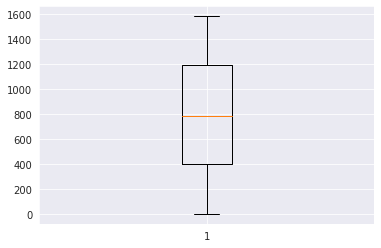

ct_cust_it


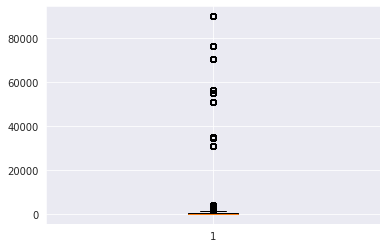

duration_days


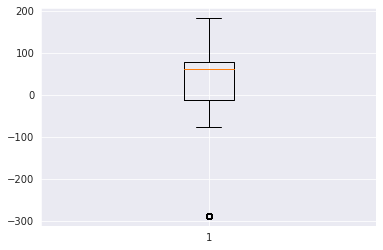

avg_order_quantity


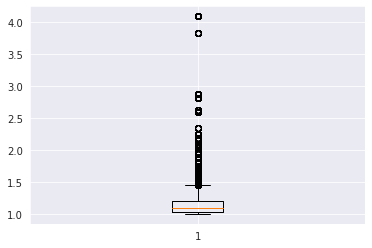

avg_price_cust


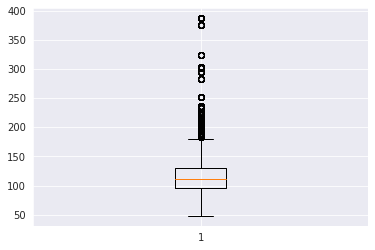

ct_cp_used_cust


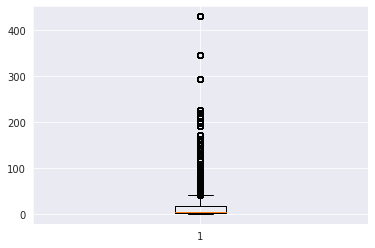

ct_brands


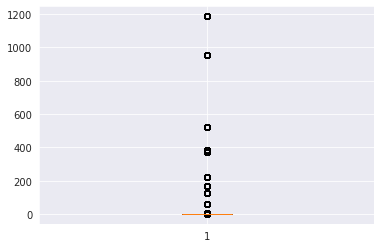

avg_cp_discount


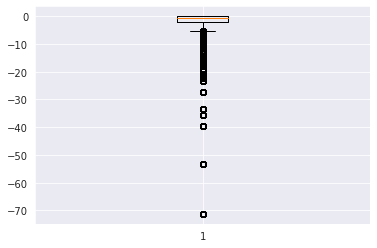

coupon_id


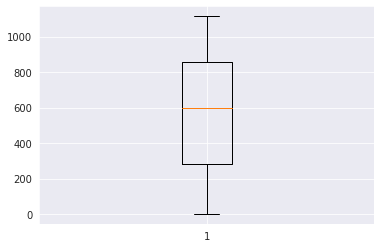

avg_total_discount


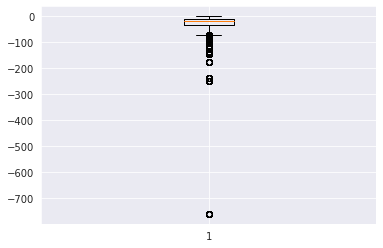

ct_cat


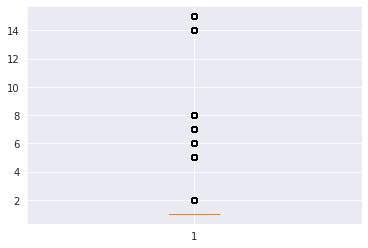

ct_items_cust


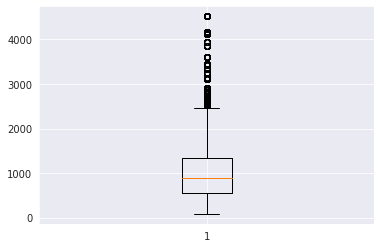

campaign_id


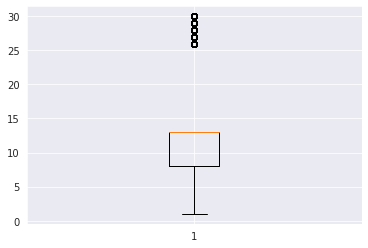

avg_quantity_cust


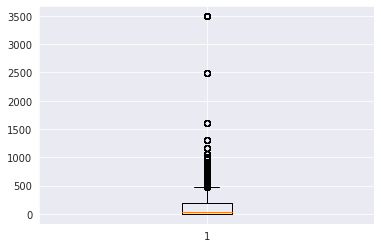

avg_price


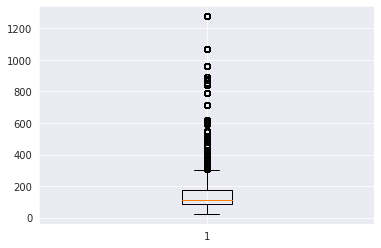

income_bracket


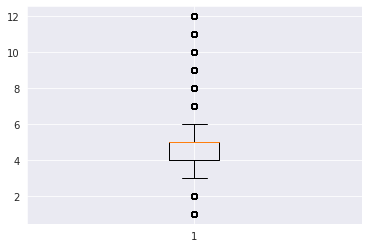

avg_oth_discount_cust


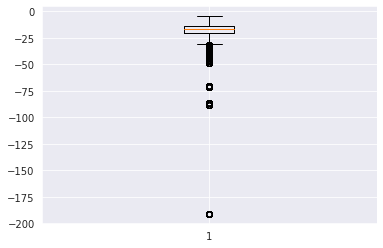

rented


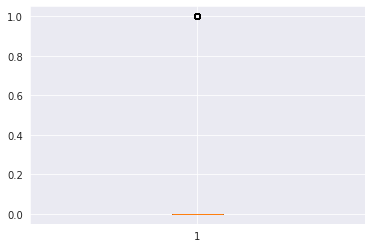

id


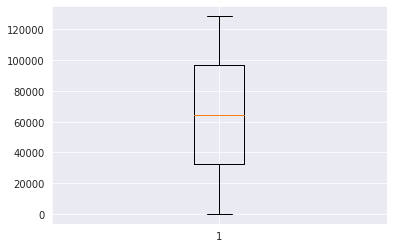

mode_cat_Dairy, Juices & Snacks


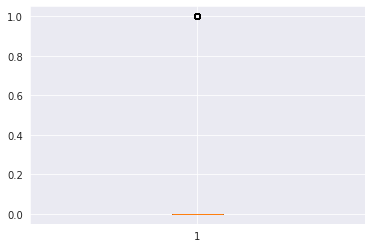

mode_cat_Flowers & Plants


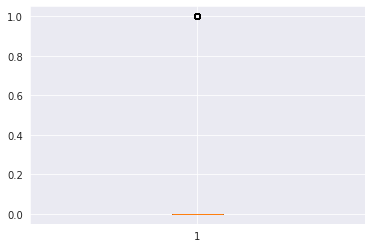

mode_cat_Grocery


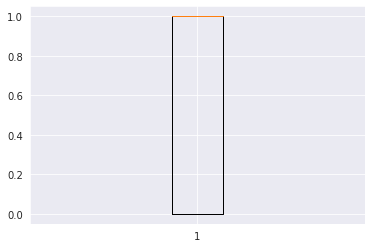

mode_cat_Meat


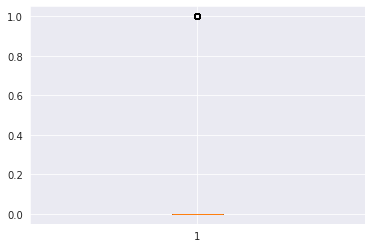

mode_cat_Natural Products


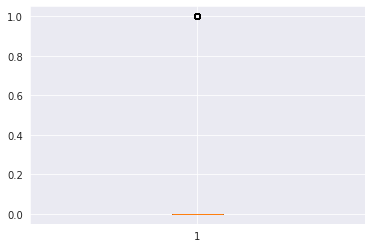

mode_cat_Packaged Meat


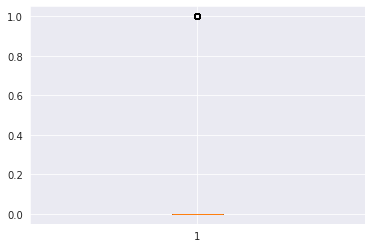

mode_cat_Pharmaceutical


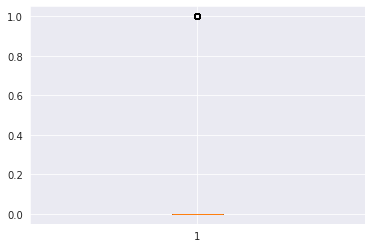

mode_cat_Prepared Food


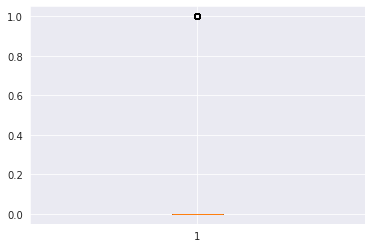

mode_cat_Seafood


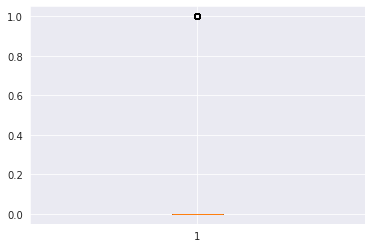

mode_cat_Skin & Hair Care


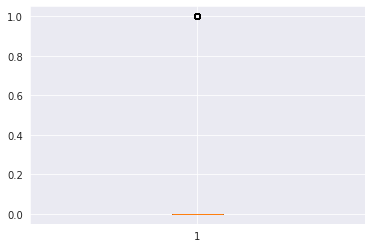

no_of_children_1


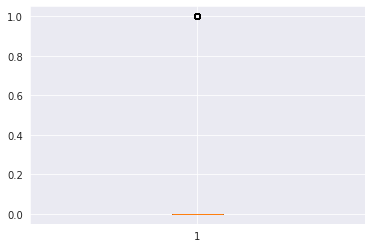

no_of_children_2


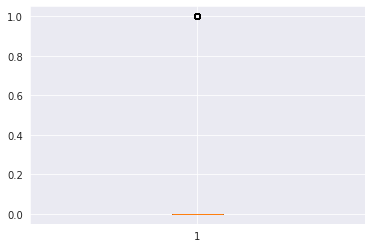

no_of_children_3+


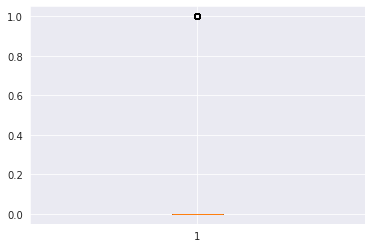

brand_type_Established


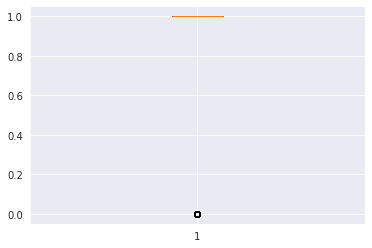

campaign_type_Y


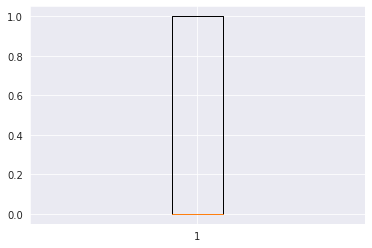

family_size_2


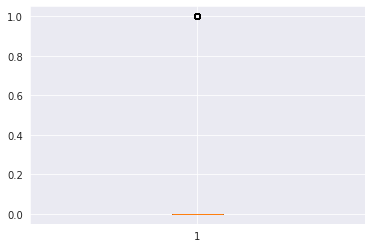

age_range_18-25


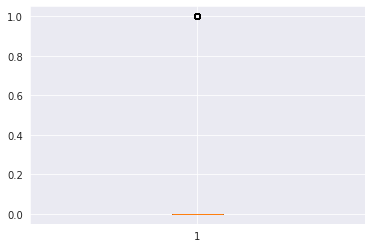

age_range_26-35


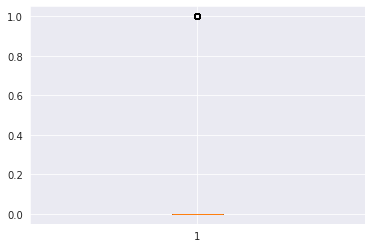

age_range_36-45


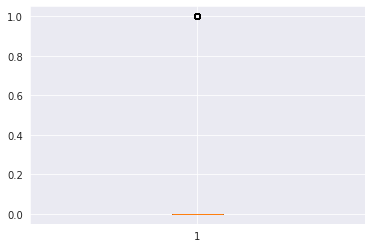

age_range_46-55


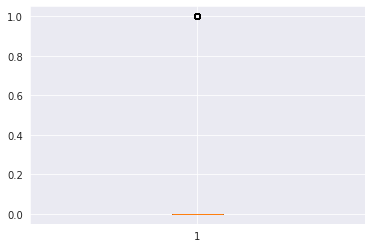

age_range_56-70


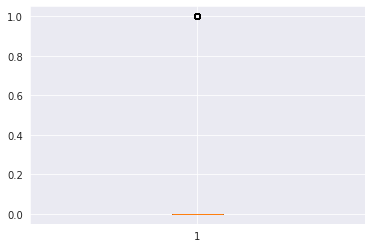

age_range_70+


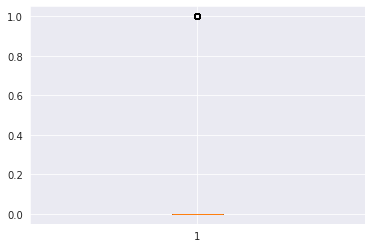

marital_status_Married


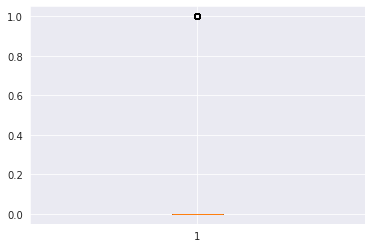

marital_status_Single


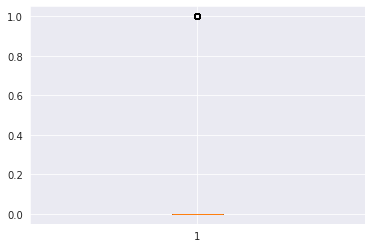

In [ ]:
for column in X_reduced.columns:
    print(column)
    plt.boxplot(X_reduced[column])
    plt.show()

In [ ]:
continuous=[]
for column in X_reduced.columns:
    if len(X_reduced[column].unique())>30:
        continuous.append(column)

In [ ]:
continuous

['customer_id',
 'ct_cust_it',
 'avg_order_quantity',
 'avg_price_cust',
 'ct_cp_used_cust',
 'avg_cp_discount',
 'coupon_id',
 'avg_total_discount',
 'ct_items_cust',
 'avg_quantity_cust',
 'avg_price',
 'avg_oth_discount_cust',
 'id']

In [ ]:
continuous.remove('customer_id')
continuous.remove('coupon_id')
continuous.remove('id')

In [ ]:
X_continuous=X_reduced[continuous]

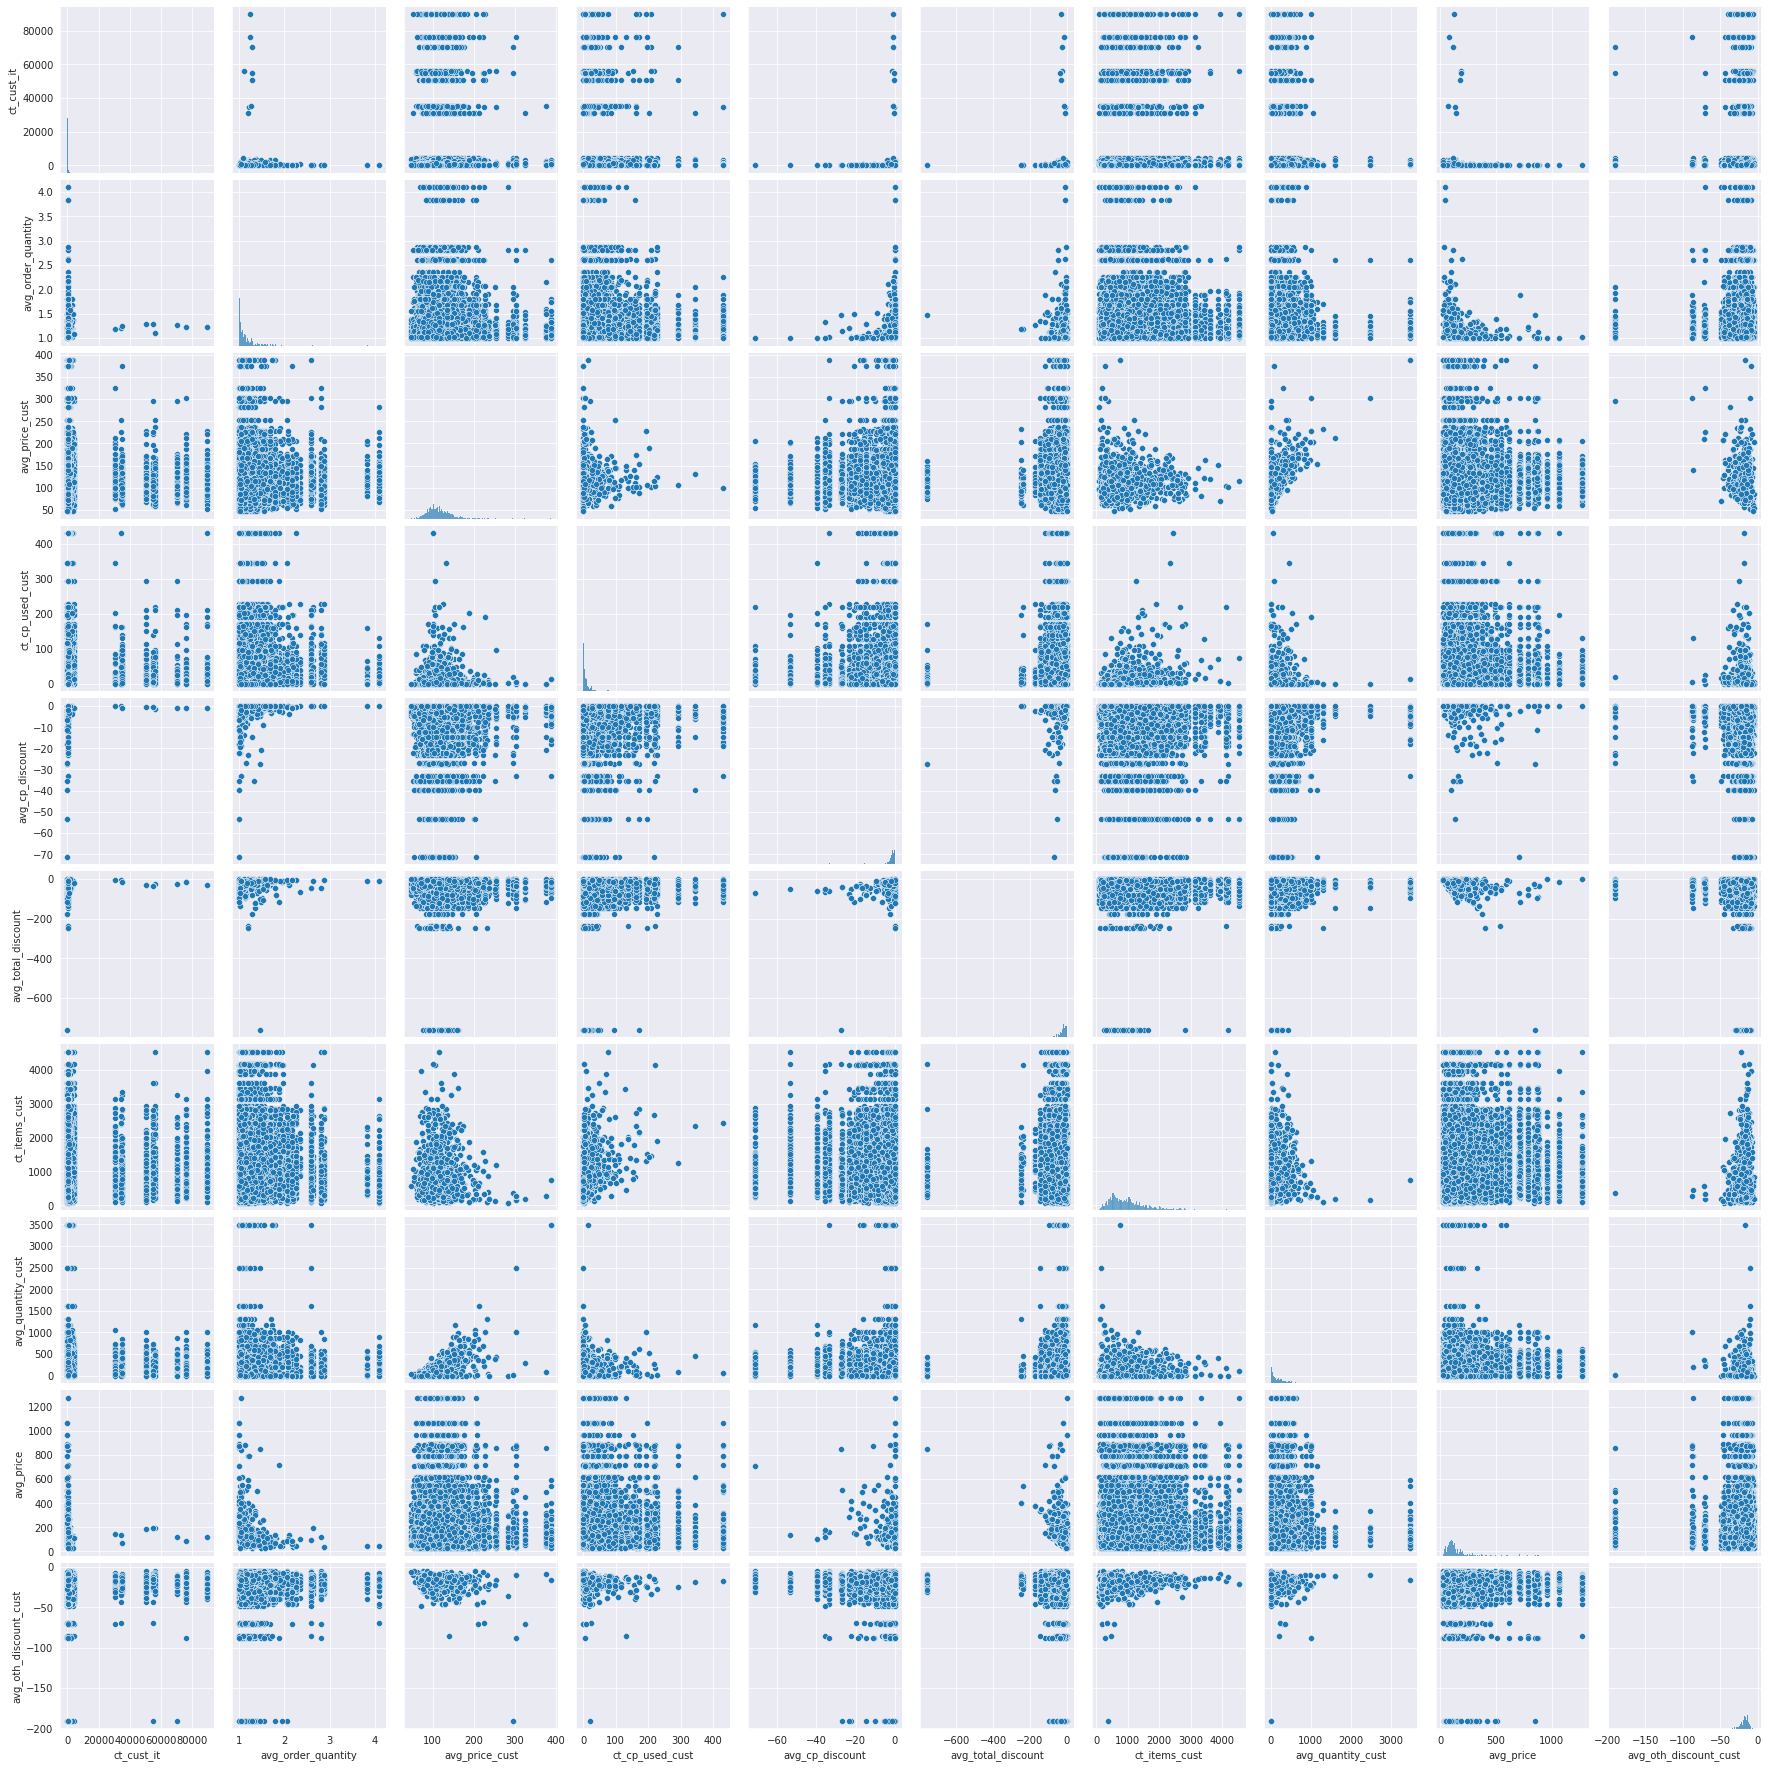

In [ ]:
sns.pairplot(X_continuous)

In [ ]:
for column in X_continuous.columns:
    print(column)
    print('99 percentile:',X_continuous[column].quantile(0.99))
   

ct_cust_it
99 percentile: 35045.0
avg_order_quantity
99 percentile: 2.3494669509594885
avg_price_cust
99 percentile: 222.3311804878049
ct_cp_used_cust
99 percentile: 203.0
avg_cp_discount
99 percentile: 0.0
avg_total_discount
99 percentile: 0.0
ct_items_cust
99 percentile: 3248.0
avg_quantity_cust
99 percentile: 831.1561085972851
avg_price
99 percentile: 854.52
avg_oth_discount_cust
99 percentile: -7.614386716657739


In [ ]:
def num_of_outliers(col,value, over=True):
    if over:
        print('Total:', sum(X_continuous[col]>value),'which is ', round(sum(X_continuous[col]>value)/len(X_continuous)*100,2),'%')
    else:
        print('Total:', sum(X_continuous[col]<value),'which is ', round(sum(X_continuous[col]<value)/len(X_continuous)*100,3),'%')

In [ ]:
num_of_outliers('avg_price_cust', 350)

Total: 158 which is  0.2 %


In [ ]:
num_of_outliers('avg_quantity_cust', 1500)

Total: 144 which is  0.18 %


In [ ]:
X_outlier =X_reduced.copy() 

In [ ]:
X_outlier.drop(X_outlier[X_outlier.avg_price_cust>350].index, inplace = True)

In [ ]:
X_outlier.drop(X_outlier[X_outlier.avg_quantity_cust>1500].index, inplace = True)

In [ ]:
num_of_outliers('avg_cp_discount',-45,False)

Total: 289 which is  0.369 %


In [ ]:
X_outlier.drop(X_outlier[X_outlier.avg_cp_discount<-45].index, inplace = True)

In [ ]:
print('0.01 percentile:',X_continuous.avg_oth_discount_cust.quantile(0.01))

0.01 percentile: -40.254088397790056


In [ ]:
X_outlier.drop(X_outlier[X_outlier.avg_oth_discount_cust<-75].index, inplace = True)

In [ ]:
num_of_outliers('avg_order_quantity',3)

Total: 140 which is  0.18 %


In [ ]:
X_outlier.drop(X_outlier[X_outlier.avg_order_quantity>3].index, inplace = True)

In [ ]:
num_of_outliers('avg_oth_discount_cust',-200,False)

Total: 0 which is  0.0 %


In [ ]:
print('The removed outliers are ',(len(X_reduced)-len(X_outlier))/len(X_reduced)*100, '% of the original size.')

The removed outliers are  1.078232464367288 % of the original size.


In [ ]:
X_outlier

,customer_id,ct_cust_it,duration_days,avg_order_quantity,avg_price_cust,ct_cp_used_cust,ct_brands,avg_cp_discount,coupon_id,avg_total_discount,...,family_size_2,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,marital_status_Married,marital_status_Single,redemption_status
0,1053,2403.0,-12,1.169768,184.260484,1.0,2,-1.241694,27,-52.974000,...,0,0,0,0,1,0,0,0,0,0
1,48,61.0,-12,1.050926,234.247013,12.0,1,0.000000,116,-10.661343,...,1,0,0,1,0,0,0,1,0,0
2,205,118.0,31,1.353802,121.094495,85.0,1,-2.987321,635,-145.485813,...,1,0,0,0,1,0,0,1,0,0
3,1050,14.0,-12,1.110390,98.276034,2.0,1,-4.452500,644,-9.463101,...,0,0,0,0,0,0,0,0,0,0
4,1489,874.0,77,1.071044,120.636103,10.0,1,-0.198055,1017,-33.827176,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78364,1523,163.0,77,1.160756,114.844654,0.0,1,0.000000,71,-18.866565,...,1,0,0,0,0,0,1,1,0,0
78365,937,249.0,133,1.129874,87.822840,1.0,3,-0.010943,547,-87.174177,...,1,0,0,0,0,0,1,1,0,0
78366,1004,1197.0,77,1.022980,107.619146,6.0,1,-3.239522,754,-70.224961,...,0,0,0,0,0,0,0,0,0,0
78367,71,312.0,-12,1.012069,86.505309,50.0,2,0.000000,134,-3.866864,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
saved_rows = pd.Index(list(set(X_reduced.index)^set(X_outlier.index)))
y_outlier=Y.drop(saved_rows)
X_reduced=X_outlier

In [ ]:
X_reduced = X_reduced.drop(['id', 'customer_id', 'campaign_id', 'coupon_id'], axis=1)

In [ ]:
df_final = X_reduced 
df_final["redemption_status"] = y_outlier

In [ ]:
df_final

,ct_cust_it,duration_days,avg_order_quantity,avg_price_cust,ct_cp_used_cust,ct_brands,avg_cp_discount,avg_total_discount,ct_cat,ct_items_cust,...,family_size_2,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,marital_status_Married,marital_status_Single,redemption_status
0,2403.0,-12,1.169768,184.260484,1.0,2,-1.241694,-52.974000,1,310,...,0,0,0,0,1,0,0,0,0,0
1,61.0,-12,1.050926,234.247013,12.0,1,0.000000,-10.661343,1,385,...,1,0,0,1,0,0,0,1,0,0
2,118.0,31,1.353802,121.094495,85.0,1,-2.987321,-145.485813,1,970,...,1,0,0,0,1,0,0,1,0,0
3,14.0,-12,1.110390,98.276034,2.0,1,-4.452500,-9.463101,1,237,...,0,0,0,0,0,0,0,0,0,0
4,874.0,77,1.071044,120.636103,10.0,1,-0.198055,-33.827176,1,562,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78364,163.0,77,1.160756,114.844654,0.0,1,0.000000,-18.866565,1,462,...,1,0,0,0,0,0,1,1,0,0
78365,249.0,133,1.129874,87.822840,1.0,3,-0.010943,-87.174177,1,257,...,1,0,0,0,0,0,1,1,0,0
78366,1197.0,77,1.022980,107.619146,6.0,1,-3.239522,-70.224961,1,1815,...,0,0,0,0,0,0,0,0,0,0
78367,312.0,-12,1.012069,86.505309,50.0,2,0.000000,-3.866864,1,938,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
df_final.to_csv('/content/drive/MyDrive/Data -DSfB/final_df.csv', index=False)